In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
df = pd.read_csv('../Resources/arrhythmia.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop('J_angle', axis=1, inplace=True)
df.dropna(inplace=True)
        
X = df.drop('class', axis=1)
y = df['class'] != 1

In [3]:
df.head()

,Age,Sex,Height,Weight,QRS_duration,P_R_interval,Q_T_interval,T_interval,P_interval,QRS_angle,...,V6_Q_wave_amplitude,V6_R_wave_amplitude,V6_S_wave_amplitude,V6_R_prime_wave_amplitude,V6_S_prime_wave_amplitude,V6_P_wave_amplitude,V6_T_wave_amplitude,V6_QRSA,V6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Fit a Random Forests classifier to the data
### YOUR CODE HERE ###
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7142857142857143


In [6]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances
feature_importances = clf.feature_importances_

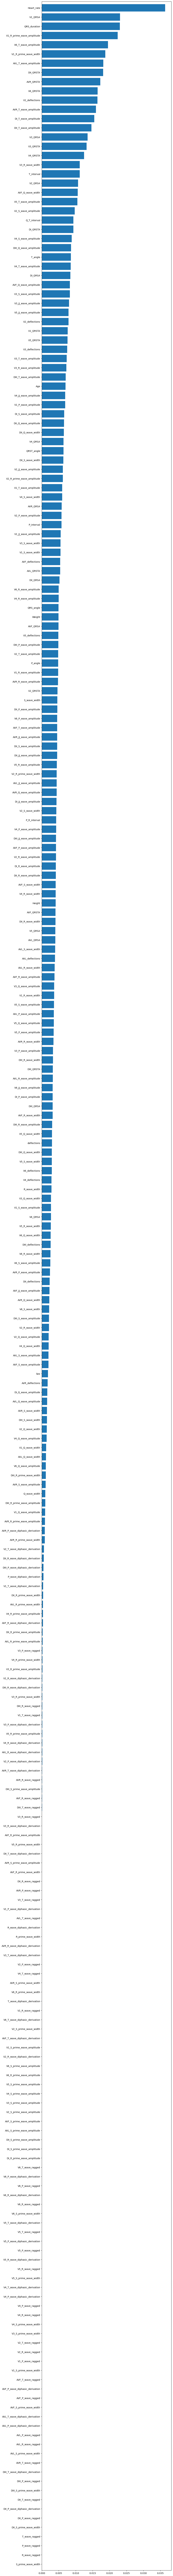

In [7]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [8]:
# Import SelectFromModel, create a selection model, and fit it to the training data
### YOUR CODE HERE ###
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [9]:
sel.transform(X)[1]

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([ 5.60e+01,  1.65e+02,  6.40e+01,  8.10e+01,  1.74e+02,  4.01e+02,
        1.49e+02,  3.90e+01,  2.50e+01,  3.70e+01, -1.70e+01,  3.10e+01,
        5.30e+01,  0.00e+00,  0.00e+00,  6.40e+01,  0.00e+00,  4.40e+01,
        2.00e+01,  2.40e+01,  0.00e+00,  0.00e+00,  2.00e+01,  2.40e+01,
        5.20e+01,  0.00e+00,  1.60e+01,  5.20e+01,  0.00e+00,  2.00e+01,
        4.40e+01,  4.80e+01,  3.20e+01,  4.80e+01,  4.40e+01,  2.80e+01,
       -6.00e-01,  7.20e+00,  0.00e+00,  1.50e+00,  1.72e+01,  2.65e+01,
        0.00e+00,  0.00e+00,  5.50e+00,  0.00e+00,  1.00e-01,  1.70e+00,
        1.76e+01,  2.95e+01,  3.00e-01, -1.60e+00, -3.00e-01,  4.00e-01,
        1.00e-01, -6.40e+00,  0.00e+00, -1.60e+00, -1.53e+01, -2.55e+01,
       -3.00e-01,  7.00e-01,  8.30e+00,  1.23e+01,  0.00e+00,  2.20e+00,
       -2.00e-01,  8.00e-01,  6.60e+00,  1.17e+01,  4.00e-01,  1.00e+00,
        0.00e+00,  5.00e-01, -6.00e-01, -2.16e+01, -2.68e+01,  4.00e-01,
        2.60e+00, -7.90e+00,  0.00e+00,  8.00e-01, 

In [10]:
# Use the selection model to create a dataset with only the selected features
### YOUR CODE HERE ###
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [11]:
# Create a logistic regression model, and fit it to the original dataset
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9523809523809523
Testing Score: 0.7142857142857143


In [12]:
# Create another logistic regression model, and fit it to the new dataset with only the selected features. How do the scores compare?
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8984126984126984
Testing Score: 0.7523809523809524
